In [8]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import yaml
import seaborn as sns
import pandas as pd
from skimage.measure import regionprops

In [9]:
# extracting all the data

data_files = []
for f in listdir("keren/sample_data/"):
    if '.npz' in f:
        data_files.append('keren/sample_data/' + f) 
        
with open("keren/meta.yaml", 'r') as meta_f:
    meta_data = yaml.safe_load(meta_f)

In [10]:
def normalize_point(X):
    channel_maxes = np.amax(X, axis=(0,1,2))
    for m in range(len(channel_maxes)):
        if channel_maxes[m] != 0:
            X[0,:,:,m] /= channel_maxes[m]
    return X
    

In [11]:
expression = np.zeros((18,51))
# iterate through all files
for f in data_files:
    print(f)
    # load data
    data = np.load(f, allow_pickle=True)
    #get_normalized data
    imgs = normalize_point(data['X'])
    #get mask and cell type dictionary
    mask = data['y'][0,:,:,0]
    cell_dict = data['cell_types'].item()
    # creation a dictionary mapping cell number to location
    regions = regionprops(mask, imgs[0,:,:,:])
    # iterate through every cell
    for cell_num in cell_dict.keys():
        # only want to look at certain cell types (not background, etc.)
        cell_type = cell_dict[cell_num]
        if cell_type not in (0,1,17):
            # only look at values of that specific cell
            coords = regions[cell_num - 1].coords
            cropped_view = imgs[0,:,:,:][(coords[:,0], coords[:,1])]
            # look at average expression of each marker of that cell
            expression[cell_type] += np.mean(cropped_view, axis=0)        


keren/sample_data/Point09.npz
keren/sample_data/Point30.npz
keren/sample_data/Point25.npz
keren/sample_data/Point20.npz
keren/sample_data/Point38.npz
keren/sample_data/Point01.npz
keren/sample_data/Point04.npz
keren/sample_data/Point32.npz
keren/sample_data/Point22.npz
keren/sample_data/Point31.npz
keren/sample_data/Point15.npz
keren/sample_data/Point28.npz
keren/sample_data/Point27.npz
keren/sample_data/Point40.npz
keren/sample_data/Point10.npz
keren/sample_data/Point36.npz
keren/sample_data/Point08.npz
keren/sample_data/Point19.npz
keren/sample_data/Point39.npz
keren/sample_data/Point05.npz
keren/sample_data/Point41.npz
keren/sample_data/Point13.npz
keren/sample_data/Point23.npz
keren/sample_data/Point18.npz
keren/sample_data/Point17.npz
keren/sample_data/Point33.npz
keren/sample_data/Point02.npz
keren/sample_data/Point35.npz
keren/sample_data/Point06.npz
keren/sample_data/Point12.npz
keren/sample_data/Point26.npz
keren/sample_data/Point24.npz
keren/sample_data/Point16.npz
keren/samp

In [12]:
cell_types_list = list(meta_data['cell_types'].values())
markers_list = meta_data['channels']

In [13]:
num_cells = np.zeros(18)
for f in data_files:
    # load data
    data = np.load(f, allow_pickle=True)
    cell_dict = data['cell_types'].item()
    # iterate through every cell
    for cell_num in cell_dict.keys():
        cell_type = cell_dict[cell_num]
        num_cells[cell_type] += 1

In [14]:
averaged_expression = np.zeros((18,51))
for i in range(18):
    averaged_expression[i] = expression[i] / num_cells[i]

[Text(0.5, 25.722222222222214, 'Marker'),
 Text(158.08159722222223, 0.5, 'Cell Type')]

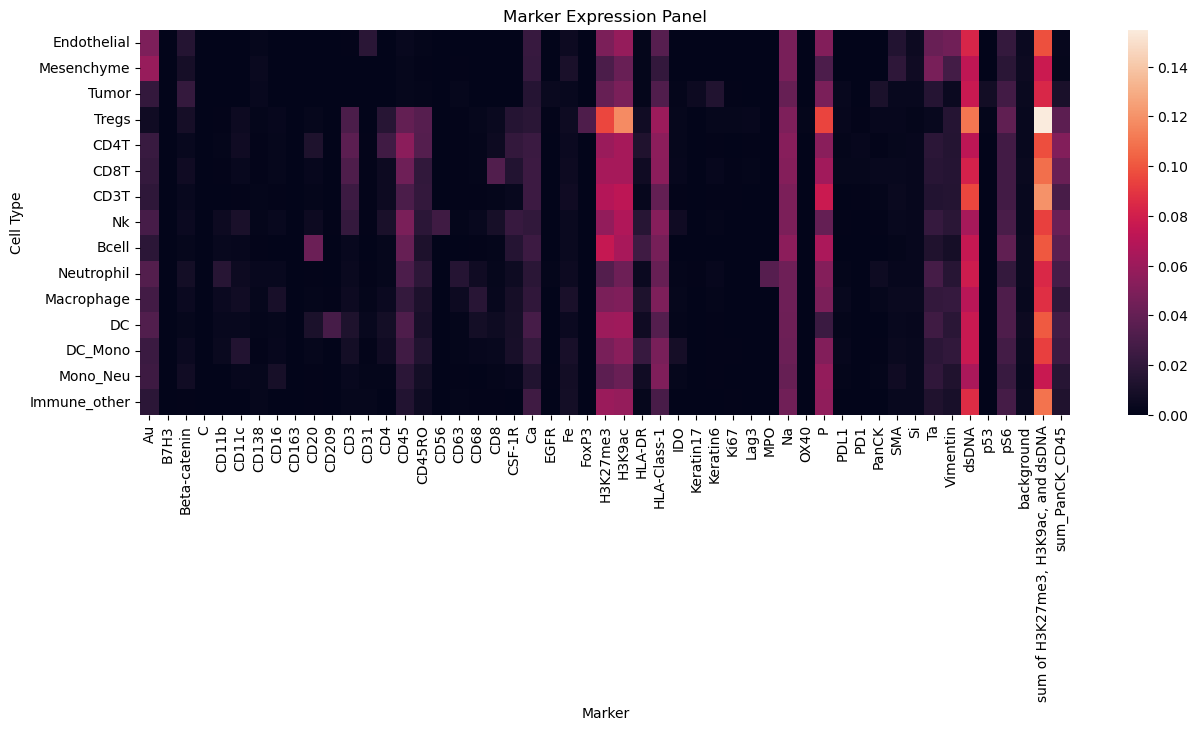

In [15]:
plt.figure(figsize=(15,5))
plt.title('Marker Expression Panel')
fig = sns.heatmap(averaged_expression[2:17], xticklabels=markers_list, 
                  yticklabels=cell_types_list[2:17])
fig.set(xlabel='Marker', ylabel='Cell Type')